# (4주차) 9월26일 -- draft
> 산점도 응용예제 4 (무상관과 독립)

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## imports 

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

## 산점도 응용예제 4 (무상관과 독립)

### 예제자료 

**예시1: 사각형**

`-` 아래와 같은 자료를 고려하자. 

In [250]:
np.random.seed(43052)
x1=np.random.uniform(low=-1,high=1,size=100000)
y1=np.random.uniform(low=-1,high=1,size=100000)

Text(0.5, 1.0, 'rect')

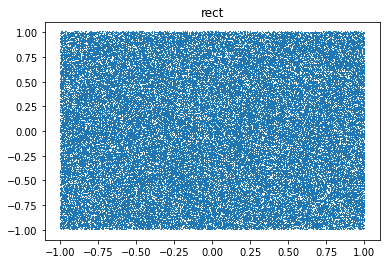

In [251]:
plt.plot(x1,y1,',')
plt.title('rect')

**예시2: 원**

`-` 예제자료 만들기..

In [252]:
np.random.seed(43052)
_x=np.random.uniform(low=-1,high=1,size=100000)
_y=np.random.uniform(low=-1,high=1,size=100000)

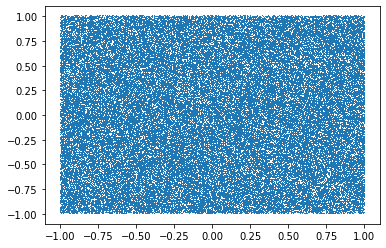

In [253]:
plt.plot(_x,_y,',')

In [254]:
radius = _x**2+_y**2 

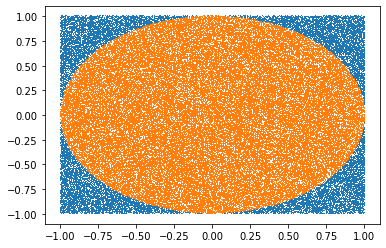

In [255]:
x2=_x[radius<1]
y2=_y[radius<1]
plt.plot(_x,_y,',')
plt.plot(x2,y2,',')

`-` 아래와 같이 자료를 관측했다고 하자. 

Text(0.5, 1.0, 'circ')

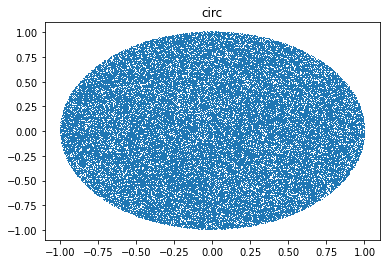

In [256]:
plt.plot(x2,y2,',')
plt.title('circ')

**예시3: 이변량정규분포**

In [257]:
np.random.seed(43052)
x3=np.random.normal(size=10000)
y3=np.random.normal(size=10000)

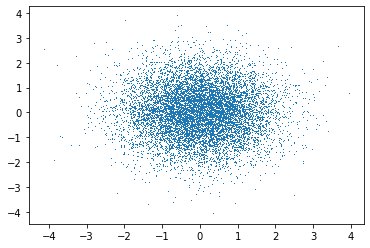

In [258]:
plt.plot(x3,y3,',')

### 상관계수 

`-` 예시1, 예시2, 예시3의 산점도를 보고 상관계수가 얼마인지 예상해보라. 실제 계산결과와 확인하라. 

In [259]:
np.corrcoef(x1,y1)

array([[1.        , 0.00521001],
       [0.00521001, 1.        ]])

In [260]:
np.corrcoef(x2,y2)

array([[ 1.        , -0.00362687],
       [-0.00362687,  1.        ]])

In [261]:
np.corrcoef(x3,y3)

array([[ 1.        , -0.01007718],
       [-0.01007718,  1.        ]])

### 독립 

`-` 예시1,2,3 중 독립인것은 무엇인가? 

`-` 예시1 vs 예시2

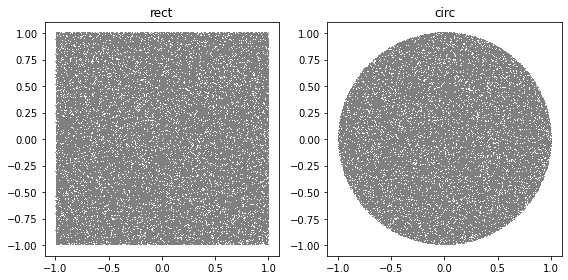

In [262]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.plot(x1,y1,',',color='gray')
ax2.plot(x2,y2,',',color='gray')
ax1.set_title('rect')
ax2.set_title('circ') 
fig.tight_layout()

In [263]:
def g(interval,data,ax,col='r'):
    a,b = interval
    x,y = data
    i = (a<x)&(x<b) 
    #ax.plot(x,y,',',color='gray') 
    ax.plot(x[i],y[i],',',color=col) 

In [264]:
g([0.85,0.95],[x1,y1],ax1)
g([0.85,0.95],[x2,y2],ax2)

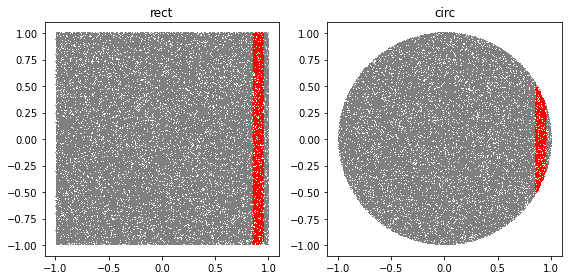

In [265]:
fig

In [266]:
g([0.05,0.15],[x1,y1],ax1,col='b')
g([0.05,0.15],[x2,y2],ax2,col='b')

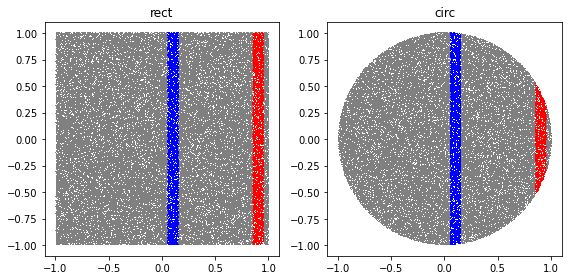

In [267]:
fig

`-` 예시3

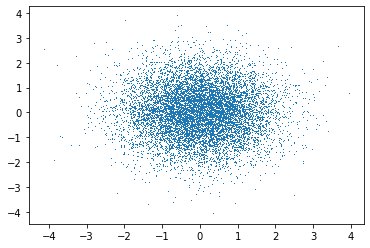

In [268]:
plt.plot(x3,y3,',')

In [272]:
def h(interval, data, ax, col='r'):
    a,b = interval
    x,y = data
    idx = (a<x)&(x<b) 
    ax.hist(y[idx],color=col)

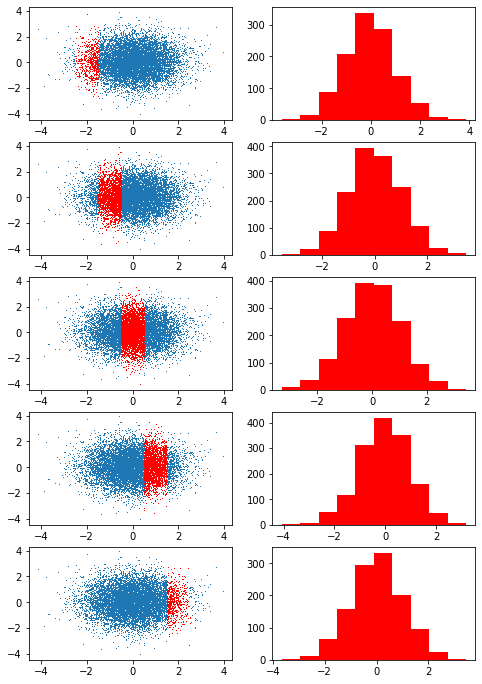

In [298]:
fig , ax = plt.subplots(5,2,figsize=(8,12))

ax[0,0].plot(x3,y3,','); g([-2.5,-1.5],[x3,y3],ax[0,0])
ax[1,0].plot(x3,y3,','); g([-1.5,-0.5],[x3,y3],ax[1,0])
ax[2,0].plot(x3,y3,','); g([-0.5,+0.5],[x3,y3],ax[2,0])
ax[3,0].plot(x3,y3,','); g([+0.5,+1.5],[x3,y3],ax[3,0])
ax[4,0].plot(x3,y3,','); g([+1.5,+2.5],[x3,y3],ax[4,0])

h([-1.0,-0.6],[x3,y3],ax[0,1])
h([-0.6,-0.2],[x3,y3],ax[1,1])
h([-0.2,+0.2],[x3,y3],ax[2,1])
h([+0.2,+0.6],[x3,y3],ax[3,1])
h([+0.6,+1.0],[x3,y3],ax[4,1])